In [1]:
import numpy as np
import fitsio
from astropy.table import Table, join
import os, sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import pandas as pd
import h5py
import corner
import mpl_scatter_density

# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

import sys
sys.path.insert(0, '/global/homes/s/severett/repos/balutils/')
from balutils import stacked_catalogs as sc

import seaborn as sb
plt.style.use('seaborn')
sb.set_context("notebook", font_scale=1.5)

/global/homes/s/severett/.conda/envs/balrog-plots/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  


In [9]:
df_file = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/df-gold-compare.fits'
gld_file = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/db_queries/y3_gold_2_2_galaxy_compare_000001.fits'

## Make Catalogs

In [35]:
df_base_file = '/project/projectdirs/des/severett/Balrog/run2/inputs/BALROG_RUN2_DEEP_CAT_FLAG0INVHS1BDFLT254v4.fits'
df = Table.read(df_base_file)

# Match to Ian's DF classifier
knn_file = 'cats/ugriz-mof02-JHK-extcorr_27May20_kNN_class.fits'
knn = Table.read(knn_file)

print('Joining with df classifier...')
df = join(df, knn, keys='id', join_type='left')

df.write(df_file, overwrite=True)

Joining with df classifier...


## Load Catalogs

In [36]:
df = Table.read(df_file) 
gld = Table.read(gld_file)

## Make Plots!

In [37]:
def calc_stats(bal, gld):
    bal_med = np.median(bal)
    bal_avg = np.mean(bal)
    gld_med = np.median(gld)
    gld_avg = np.mean(gld)
    
    return bal_med, bal_avg, gld_med, gld_avg

In [8]:
# gld1 = gld[gld['EXTENDED_CLASS_df'] > 1]
# gld2 = gld[gld['EXTENDED_CLASS_MASH_MOF'] > 1]
# df = df[df['NearestNeighbors_class'] == 1]

g 1
r 2
i 3
z 4
g-r, 5
r-i, 6
bdf_g_1 7
bdf_g_2 8
bdf_T 9
bdf_fracdev 10
bdf_T 11
bdf_T 12


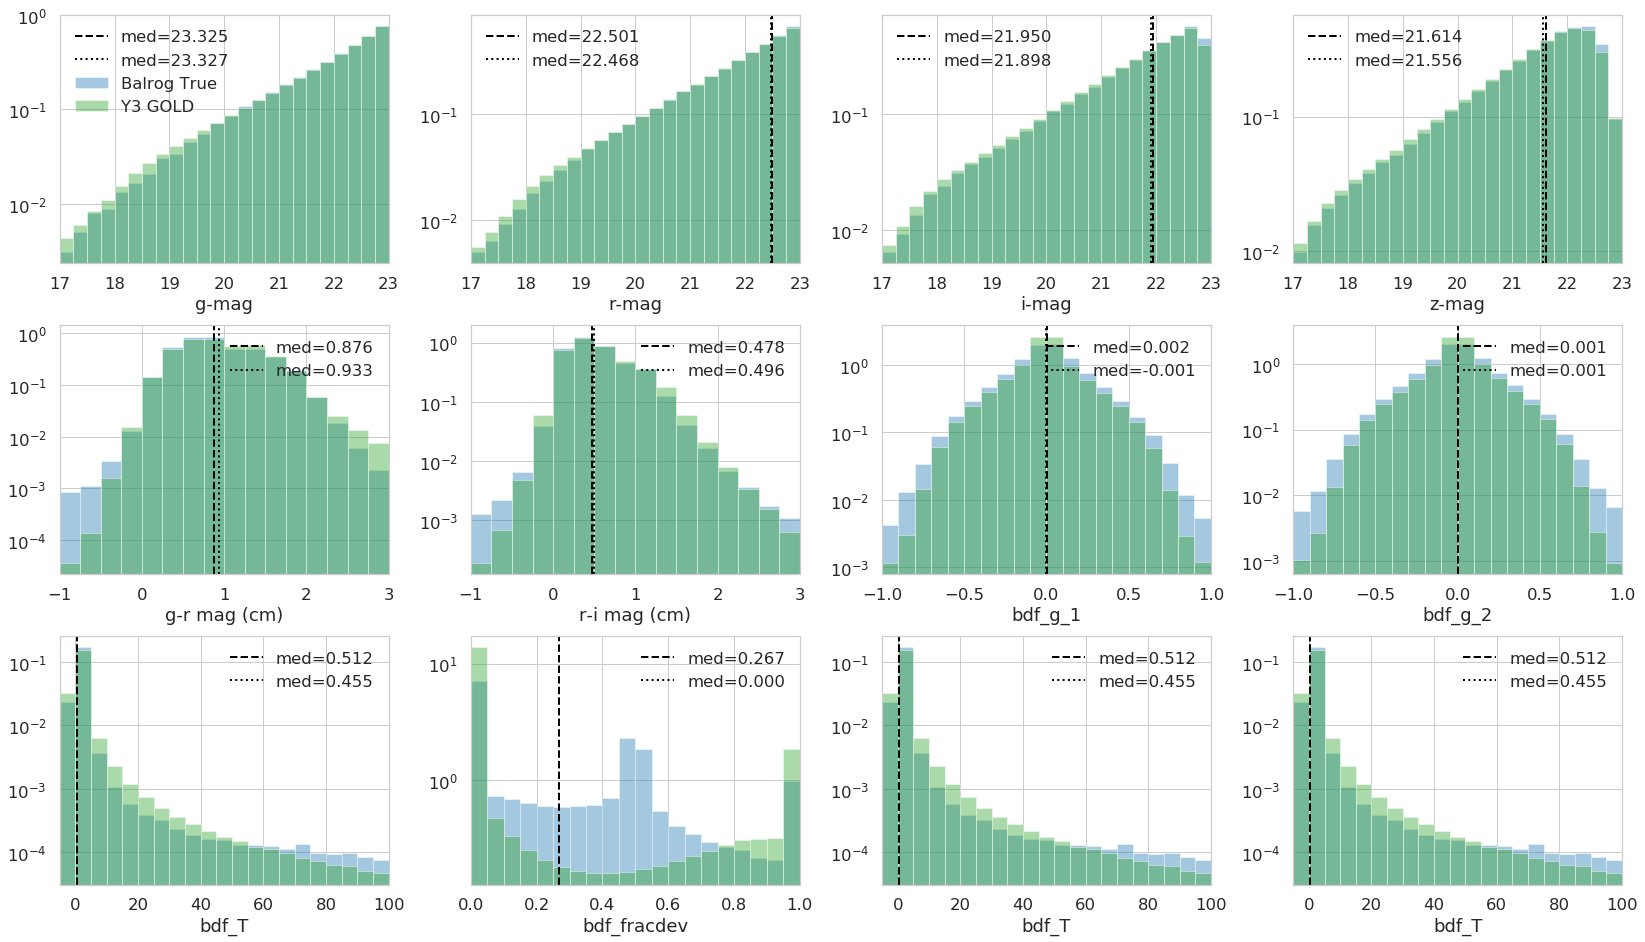

In [50]:
sb.set_style('whitegrid')

fig = plt.Figure()

vb = True

bindx = dict(zip('griz', range(4)))

xlim = {
    'bdf_mag_deredden' : [16, 23],
    'bdf_mag' : [17, 23],
    'g-r' : [-1, 3],
    'r-i' : [-1, 3],
    'i-z' : [-1, 3],
    'bdf_g_1' : [-1, 1],
    'bdf_g_2' : [-1, 1],
    'bdf_T' : [-5, 100],
    'bdf_fracdev': [0, 1],
    'bdf_flux_s2n_i' : [0, 100],
    'bdf_TdByTe' : [0, 100]
}

dx = {
    'bdf_mag_deredden' : 0.25,
    'bdf_mag' : 0.25,
    'g-r' : .25,
    'r-i' : .25,
    'i-z' : .25,
    'bdf_g_1' : 0.1,
    'bdf_g_2' : 0.1,
    'bdf_T' : 5,
    'bdf_fracdev' : 0.05,
    'bdf_flux_s2n_i' : 5,
    'bdf_TdByTe' : 5
}

bal_c = 'tab:blue'
gld_c = 'tab:green'

Nrows, Ncols = 3, 4
# Nrows, Ncols = 2, 4
gs = gridspec.GridSpec(Nrows, Ncols)

cols = ['bdf_g_1', 'bdf_g_2', 'bdf_T', 'bdf_fracdev', 'bdf_T', 'bdf_T']

# mag_colname = 'meas_cm_mag_deredden'
mag_colname = 'bdf_mag'

mcut = 23

df_mean_riz = np.mean(np.array([
    df[mag_colname][:,1], 
    df[mag_colname][:,2],    
    df[mag_colname][:,3]
]
), axis=0)
df_cuts = np.where(df_mean_riz < mcut)

gld_mean_riz = np.mean(np.array([
    gld['SOF_CM_MAG_R'], 
    gld['SOF_CM_MAG_I'],    
    gld['SOF_CM_MAG_Z']
]
), axis=0)
gld_cuts = np.where(gld_mean_riz < mcut)

# cuts = np.where(
# #     (df[mag_colname][:,0] >= xlim[col][0]) &
# #     (df[mag_colname][:,0] <= xlim[col][1]) &     
# #     (df[mag_colname][:,1] >= xlim[col][0]) &
#     (df[mag_colname][:,1] <= xlim[col][1]) & 
# #     (df[mag_colname][:,2] >= xlim[col][0]) &
#     (df[mag_colname][:,2] <= xlim[col][1]) &     
# #     (df[mag_colname][:,3] >= xlim[col][0]) &
#     (df[mag_colname][:,3] <= xlim[col][1]) 
# )

k = 0
for b in 'griz':
    k += 1
    
    bi = bindx[b]
    if vb is True:
        print(b, k)

    col = mag_colname
    
    if 'deredden' in col:
        gcol = 'SOF_CM_MAG_CORRECTED'
    else:
        gcol = 'SOF_CM_MAG'
    
    bal_x = df[col][df_cuts,bi]
    gld_x = gld[f'{gcol}_{b}'.upper()][gld_cuts]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[col][0]) &
#         (bal_x <= xlim[col][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[col][0]) &
#         (gld_x <= xlim[col][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
#     print(f'{bal_med:.5f} vs {gld_med:.5f}, {bal_avg:.5f} vs {gld_avg:.5f}')
    
    plt.subplot(Nrows, Ncols, k)
    
    if k == 1:
        l1 = 'Balrog True'
        l2 = 'Y3 GOLD'
    else:
        l1, l2 = None, None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    sb.distplot(bal_x, bins=xbins, hist_kws={'label':l1}, norm_hist=True, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    sb.distplot(gld_x, bins=xbins, label=l2, norm_hist=True, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
    plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{b}-mag')
#     plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    plt.legend()
        
for b1, b2 in zip('gr', 'ri'):
    k += 1
    
    if vb is True:
        print(f'{b1}-{b2}, {k}')
        
    col = mag_colname
    
    if 'deredden' in col:
        gcol = 'SOF_CM_MAG_CORRECTED'
    else:
        gcol = 'SOF_CM_MAG'
    
    b1i = bindx[b1]
    b2i = bindx[b2]
    
    bal_x = df[col][df_cuts,b1i] - df[col][df_cuts,b2i]
    gld_x = gld[f'{gcol}_{b1}'.upper()][gld_cuts] - gld[f'{gcol}_{b2}'.upper()][gld_cuts]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[f'{b1}-{b2}'][0]) &
#         (bal_x <= xlim[f'{b1}-{b2}'][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[f'{b1}-{b2}'][0]) &
#         (gld_x <= xlim[f'{b1}-{b2}'][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
    plt.subplot(Nrows, Ncols, k)
    
    xbins = np.arange(xlim[f'{b1}-{b2}'][0], xlim[f'{b1}-{b2}'][1]+dx[col], dx[f'{b1}-{b2}'])
    sb.distplot(bal_x, bins=xbins, norm_hist=True, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    sb.distplot(gld_x, bins=xbins, norm_hist=True, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
    plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{b1}-{b2} mag (cm)')
#     plt.ylabel('Counts')
    plt.xlim(xlim[f'{b1}-{b2}'])
    plt.yscale('log')
    plt.legend()    
    
# For ease
df['bdf_g_1'] = df['bdf_g'][:,0]
df['bdf_g_2'] = df['bdf_g'][:,1]
# df['bdf_flux_s2n_i'] = df['bdf_flux_s2n'][:,2]
for col in cols:
    k += 1
    
    if vb is True:
        print(col, k)
        
    bal_x = df[col][df_cuts]
    gld_x = gld[col.replace('bdf', 'sof_cm').upper()][gld_cuts]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[col][0]) &
#         (bal_x <= xlim[col][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[col][0]) &
#         (gld_x <= xlim[col][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
    plt.subplot(Nrows, Ncols, k)
    
    if 'fracdev' in col:
        kws = {'bw' : 0.01}
    else:
        kws = None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    sb.distplot(bal_x, bins=xbins, kde_kws=kws, norm_hist=True, kde=False, color=bal_c)#linewidth=2)
    sb.distplot(gld_x, bins=xbins, kde_kws=kws, norm_hist=True, kde=False, color=gld_c)#linewidth=2, linestyle='--')
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
    plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{col}')
#     plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    plt.legend()
    
# plt.suptitle('Using EXTENDED_CLASS_df > 1')
    
w = 0.25
h = 0.25
plt.subplots_adjust(wspace=w, hspace=h)
plt.gcf().set_size_inches(28, 16)

In [20]:
gld.colnames

['EXTENDED_CLASS_MASH_MOF',
 'EXTENDED_CLASS_SOF',
 'SOF_CM_MAG_G',
 'SOF_CM_MAG_R',
 'SOF_CM_MAG_I',
 'SOF_CM_MAG_Z',
 'SOF_CM_MAG_CORRECTED_G',
 'SOF_CM_MAG_CORRECTED_R',
 'SOF_CM_MAG_CORRECTED_I',
 'SOF_CM_MAG_CORRECTED_Z',
 'SOF_CM_T',
 'SOF_CM_FRACDEV',
 'SOF_CM_TDBYTE',
 'SOF_CM_FLUX_S2N_G',
 'SOF_CM_FLUX_S2N_R',
 'SOF_CM_FLUX_S2N_I',
 'SOF_CM_FLUX_S2N_Z',
 'SOF_CM_G_1',
 'SOF_CM_G_2']